In [ ]:
!wget https://raw.githubusercontent.com/mattgroh/fitzpatrick17k/main/fitzpatrick17k.csv

In [ ]:
import requests
import shutil
def download_image(image_url, file_place):
    res = requests.get(image_url, stream=True, headers={'User-Agent': "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36"})
    if res.status_code == 200:
        with open(file_place, 'wb') as f:
          shutil.copyfileobj(res.raw, f)
        # print("Image successfully downloaded", file_place)
    else:
        print("image coulnd't be retrieved")

In [ ]:
import pandas as pd
df = pd.read_csv("fitzpatrick17k.csv")
sources = []
for url in df['url']:
    if type(url) == float:
        sources.append('nan')
        continue
    if url.startswith("https://www.dermaamin.com/"):
      sources.append("DermaAmin")
    else:
      sources.append("AtlasDermatologico")

df["source"] = sources
df.head()

In [ ]:
url = df['url'][0]
download_image(url, "image.jpg")

In [ ]:
label_col = "label"
num_classes = len(df['label'].unique())
img_size = 300

In [ ]:
import os
import requests
from PIL import Image
import uuid

def download(row, folder):
    filedir = folder + "/" + row[label_col]
    filedir = filedir.replace(" ", "_")

    if not os.path.isdir(filedir):
        os.system("mkdir " + filedir)

    try: 
        filepath = filedir + "/" + str(uuid.uuid4()) + ".jpeg"
        download_image(row["url"], filepath)
    except:
        print(row['source'], "failed")

In [ ]:
def format_string(x):
    x = x.replace(" ", "_")
    return x 


df['label'] = df['label'].apply(format_string)



In [ ]:
classifications = list(df['label'].unique())
len(classifications)

In [ ]:
data = "Data"

os.system("mkdir " + data) 

In [ ]:
for label in classifications:

    folder_path = data + "/" + label 
    if not os.path.isdir(folder_path):
        os.system("mkdir " + folder_path)

    folder_path = folder_path.replace(" ", "_")

    folder_df = df[df['label'] == label] 

    for url in folder_df['url']:
        try: 
            filepath = folder_path + "/" + str(uuid.uuid4()) + ".jpeg"
            download_image(url, filepath)
        except:
            print("failed")

    
        
    

In [ ]:
start_dir = './Data'

for folder in os.listdir(start_dir):
    if folder.startswith('.'):
        continue
    print(folder)

In [ ]:
import shutil 
import PIL 
import os 
from PIL import Image 


train_dir = './train'
val_dir = './validation'

os.system("mkdir " + train_dir)
os.system("mkdir " + val_dir)

start_dir = './Data'

stack = []
test_size = 0.2 





In [ ]:
for folder in os.listdir(start_dir):
    if folder.startswith('.'):
        continue
    stack.append(folder) 

while stack:
    cur_dir = stack.pop() 
    os.system("mkdir " + train_dir + "/" + cur_dir)
    os.system("mkdir " + val_dir + "/" + cur_dir)

    n = len(os.listdir(start_dir + "/" + cur_dir))
    test_n = int(test_size*n) 

    idx = 0

    for file in os.listdir(start_dir+"/"+cur_dir):
        source = start_dir + "/" + cur_dir + "/" + file
        img = Image.open(source)
        try:
            img = img.resize((250,250))
            img.save(source)
            if idx < test_n:
                destination = val_dir + "/" + cur_dir + "/" + file
                shutil.copy(source, destination)
                print('Moved:', file)
                idx += 1
            else:
                destination = train_dir + "/" + cur_dir + "/" + file
                shutil.copy(source, destination)
                print('Moved:', file)
                idx += 1
        except:
            continue



In [1]:
import os 

label = []
size = []

path = './Data'
for folder in os.listdir(path):
    if folder.startswith('.'):
        continue  
    count = 0
    for file in os.listdir(path + "/" + folder):
        count += 1

    label.append(folder)
    size.append(count) 

    print(folder + ": " + str(count))
 
        
        

sarcoidosis: 349
xeroderma_pigmentosum: 81
hidradenitis: 90
melanoma: 258
psoriasis: 653
granuloma_annulare: 211
neutrophilic_dermatoses: 361
acne_vulgaris: 335
kaposi_sarcoma: 156
necrobiosis_lipoidica: 123
nematode_infection: 260
dermatofibroma: 79
photodermatoses: 348
drug_induced_pigmentary_changes: 71
allergic_contact_dermatitis: 430
actinic_keratosis: 11


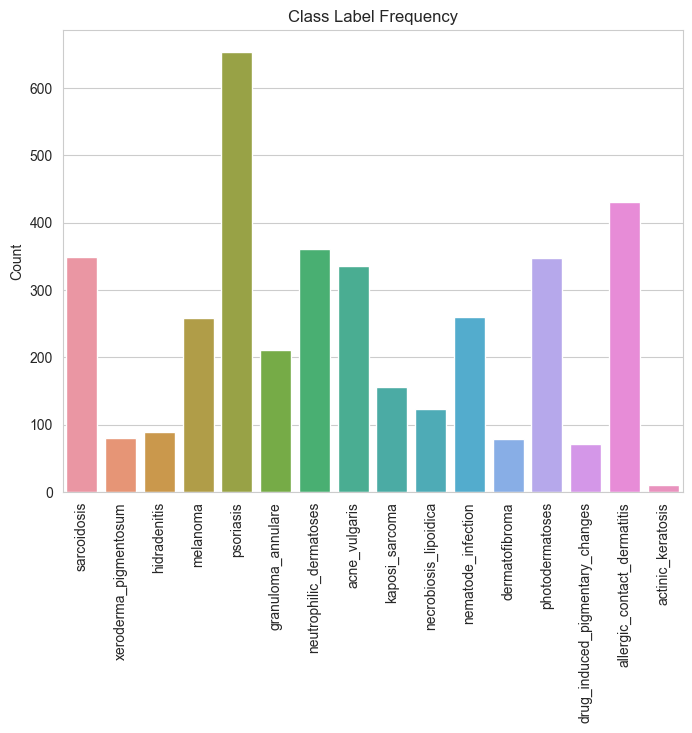

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt


# create barplot with vertical x-axis labels
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.barplot(x=label, y=size)
ax.set_xticklabels(label, rotation=90)
ax.set_ylabel("Count")
ax.set_title("Class Label Frequency")

plt.show()


In [4]:
import PIL
import os
from PIL import Image

In [10]:
def resize(img):
    img = Image.open(img)
    img = img.resize((224, 224))
    img.save(img) 


In [13]:
train = './train/'
test = './validation/' 

def traverse(path):
    for folder in os.listdir(path):
        if folder.startswith('.'):
            continue 
        img_folder = path + "/" + folder 
        for img in os.listdir(img_folder):
            if img[-4] != 'jpeg':
                continue 
            else:
                resize(img_folder + "/" + img) 


traverse(train)
traverse(test)



In [7]:
img = Image.open('train/acne_vulgaris/0ad9d775-3b9f-4b46-94a3-6adf6bd362e9.jpeg')



In [9]:
img.size

(250, 250)